In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSR/Project_yes/Laptop/laptop_price.csv', encoding = 'unicode_escape')

In [4]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


#Data Cleaning

In [6]:
df.drop(columns = ['laptop_ID','Product'], inplace = True)

In [7]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [8]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [9]:
df.duplicated().sum()

29

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(1274, 11)

In [12]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
69,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,1TB HDD,Nvidia GeForce GTX 1050 Ti,Linux,3kg,949.0
1189,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.2kg,2599.0
193,Lenovo,Notebook,17.3,1600x900,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,No OS,2.8kg,698.0


In [13]:
# 88.92 inr >> 1 euro
df['Price_euros'] = round(df['Price_euros'] * 88.92).astype('int')

In [14]:
df.rename(columns = {'Price_euros':'Price'}, inplace = True)

In [15]:
#another way to access the columns
df.Ram

,Ram
0,8GB
1,8GB
2,8GB
3,16GB
4,8GB
...,...
1269,4GB
1270,4GB
1271,16GB
1272,2GB


In [16]:
# clean the ram column
# lambda is used to apply functions on the entire column
df['Ram'] = df['Ram'].apply(lambda x : x.replace("GB","")).astype('int')

<Axes: xlabel='Ram'>

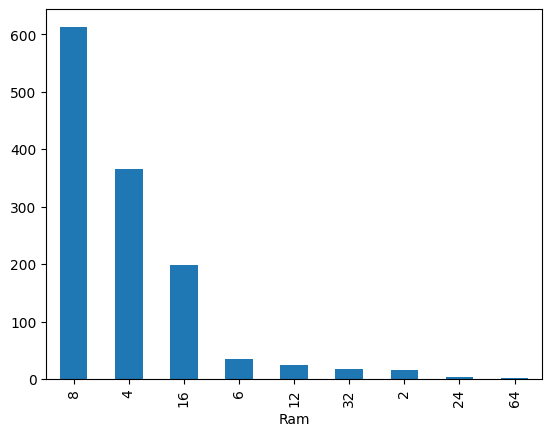

In [17]:
#EDA
df['Ram'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Ram', ylabel='Price'>

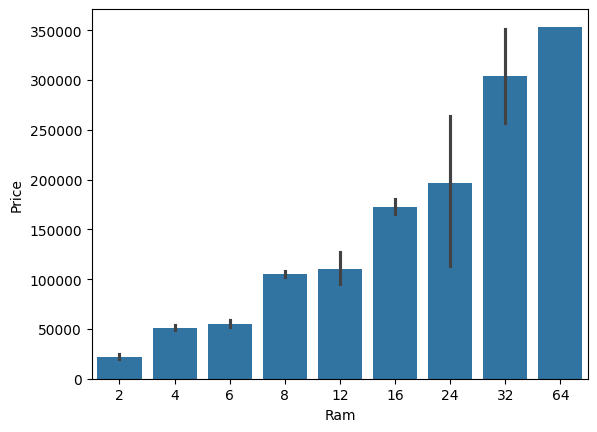

In [18]:
#Ram vs bar
sns.barplot(x = df['Ram'], y = df['Price']) #the black lines are the outliers

The bigger the black line the more the outliers, there are more outliers in 24GB Ram

#Documentation

In [19]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119125
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,79934
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51129
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,225630
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160376


In [20]:
df['Weight'] = df['Weight'].apply(lambda x : x.replace("kg","")).astype('float')

In [21]:
df['Weight'].value_counts()

,count
Weight,
2.20,119
2.10,58
2.00,45
2.40,42
2.50,38
...,...
4.50,1
1.14,1
3.80,1


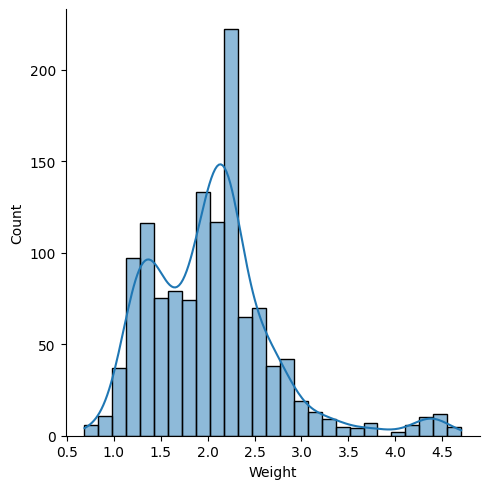

In [22]:
sns.displot(x = df['Weight'],kde = True)
#displot is used to visualize data in form of histogram and kde line... here data is divided into bins

A KDE curve, or kernel density estimation curve, is a smooth curve that represents the distribution of data in a dataset

<Axes: xlabel='Weight', ylabel='Price'>

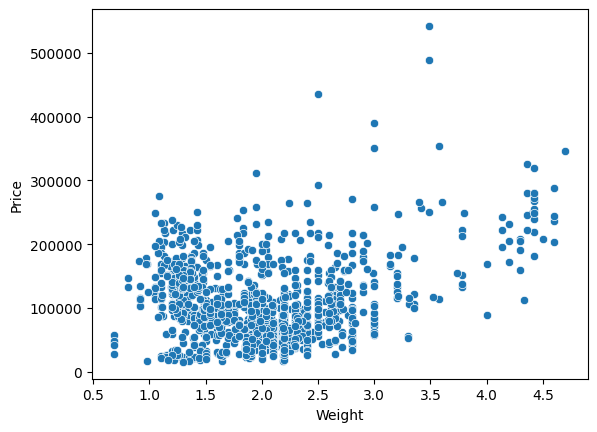

In [23]:
sns.scatterplot(x = df['Weight'], y= df['Price'])

In [24]:
px.scatter(x= df['Weight'],y= df['Price'], title = "Weight vs Price")


This scatterplot shows the relationship between weight of a laptop and its price, here we can get an idea that its pretty much evenly distributed.

<Axes: xlabel='Company'>

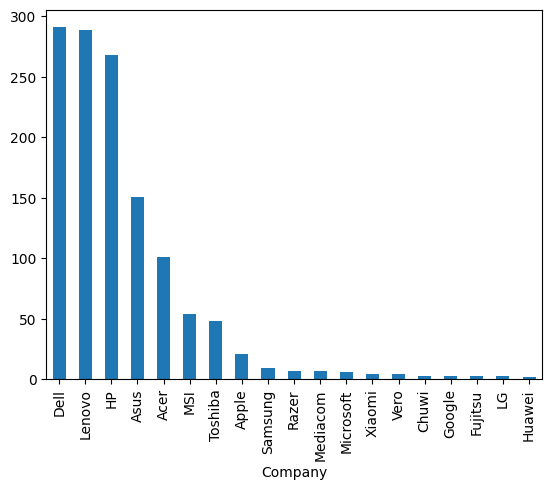

In [25]:
df['Company'].value_counts().plot(kind = 'bar')

In [26]:
#we will get only those companies which has repeated more than 10 times to get a better analysis
#we cant judge the price of a company's laptop just by taking few samples
#Filtering data
df = df[df.groupby('Company')['Company'].transform('count') > 10]

In [27]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21


<Axes: xlabel='Company', ylabel='Price'>

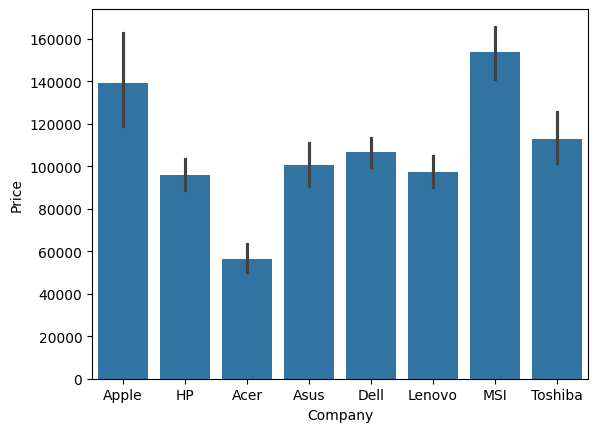

In [28]:
sns.barplot(x = df['Company'], y = df['Price'])

The graph shows that MSI and Apple have pricest laptops exceeding 1,00,000 rupees

In [29]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
546,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.87,69802


<Axes: xlabel='TypeName'>

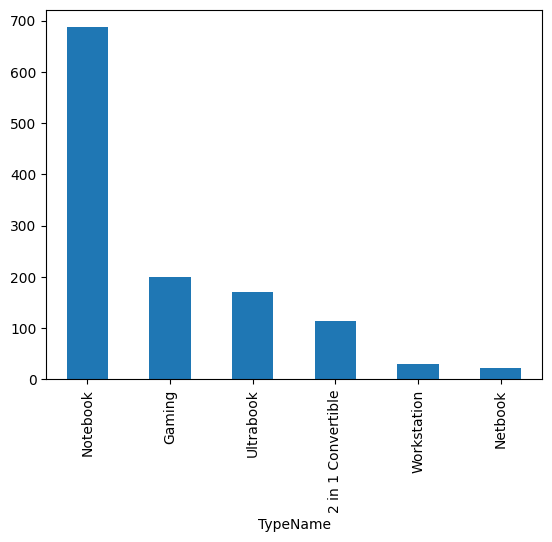

In [30]:
df['TypeName'].value_counts().plot(kind = 'bar')

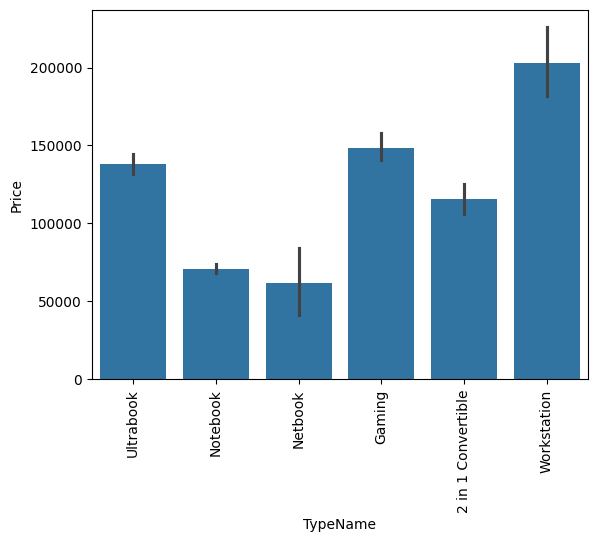

In [31]:
sns.barplot( x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [32]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [33]:
df.shape #before dropping less than 10 counts for inches

(1223, 11)

In [34]:
df = df[df.groupby('Inches')["Inches"].transform('count') > 10]

In [35]:
df.shape #after dropping

(1198, 11)

In [36]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29


<Axes: xlabel='Inches'>

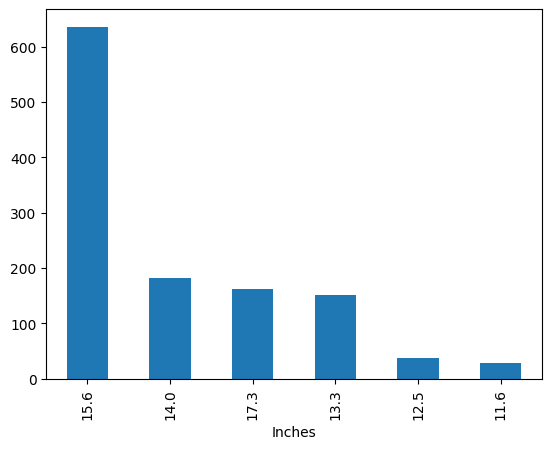

In [37]:
df['Inches'].value_counts().plot(kind = 'bar')

<ipython-input-38-cba3f8ef75a7>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Inches', ylabel='Price'>

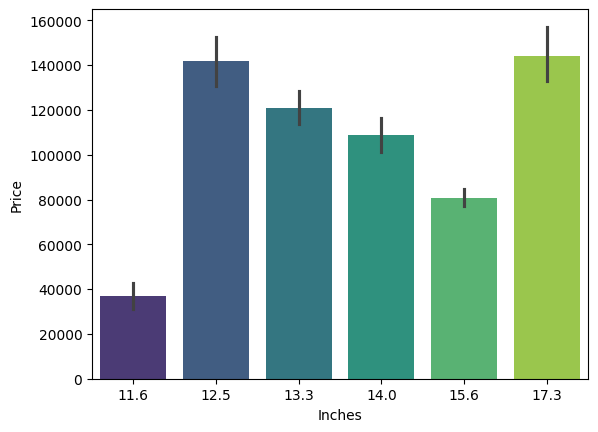

In [38]:
sns.barplot(x = df['Inches'], y = df['Price'], palette= 'viridis')

<ipython-input-39-577deea09f9d>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='Inches', ylabel='Price'>

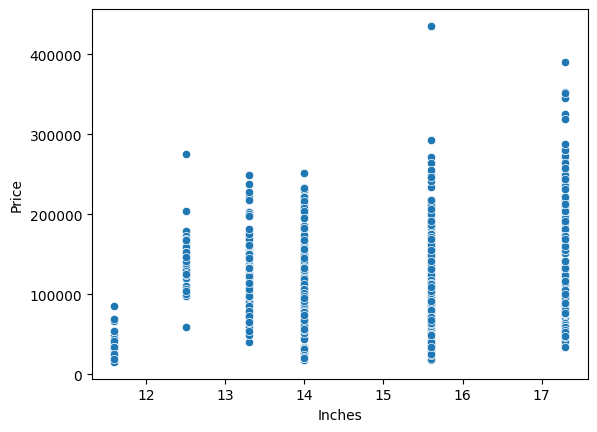

In [39]:
sns.scatterplot(x = df['Inches'], y = df['Price'], palette= 'viridis')

In [40]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
865,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.07,80917


In [41]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [42]:
#lets find the PPI (pixel per unit) to make similar for all values
#now we need horizontal res and vertical res for this formula.... lets extract it


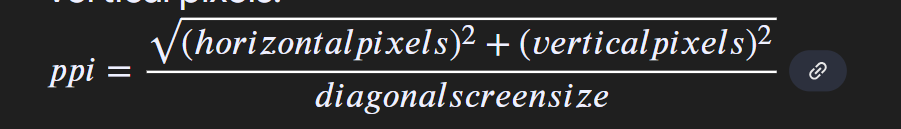

In [43]:
a = 'IPS Panel Full HD 2560x1440'


In [44]:
a.split()

['IPS', 'Panel', 'Full', 'HD', '2560x1440']

In [45]:
a.split()[-1].split('x')[0] #x res

'2560'

In [46]:
a.split()[-1].split('x')[1] #y res

'1440'

In [47]:
df['x_res'] = df['ScreenResolution'].apply(lambda x: x.split()[-1].split('x')[0]).astype(int)

In [48]:
df['y_res'] = df['ScreenResolution'].apply(lambda x: x.split()[-1].split('x')[1]).astype(int)

In [49]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119125,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79934,1440,900


In [50]:
def pow(a,b):
  return a**b

In [51]:
pow(2,3)

8

In [52]:
x = lambda a : a**2 #performs the same job as the above normal function

In [53]:
x(2)

4

In [54]:
#the better the ppi the better the image quality
df['ppi'] = round(((df['x_res']**2) + (df['y_res']**2))**0.5 / df['Inches'],2)

In [55]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119125,2560,1600,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79934,1440,900,127.68


<Axes: xlabel='ppi', ylabel='Price'>

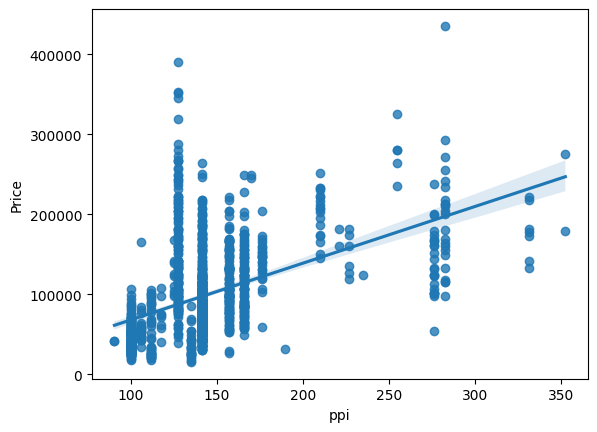

In [56]:
sns.regplot(x=df['ppi'], y = df['Price'])

As the ppi increases the price also increases, the line signifies the regression line and the shaded area gives a range for the regression model to fluctuate

In [57]:
a = 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160'
#If there is IPS in the screen return 1 else 0
(lambda a: 1 if 'IPS' in a else 0)('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')


1

In [58]:
df['IPS'] = df['ScreenResolution'].apply(lambda a : 1 if "IPS" in a else 0)

In [59]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda a : 1 if "Touchscreen" in a else 0)

In [60]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,ppi,IPS,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119125,2560,1600,226.98,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79934,1440,900,127.68,0,0


<Axes: xlabel='Touchscreen'>

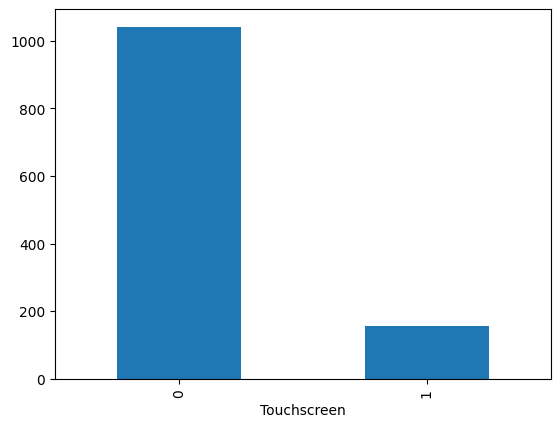

In [61]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='IPS'>

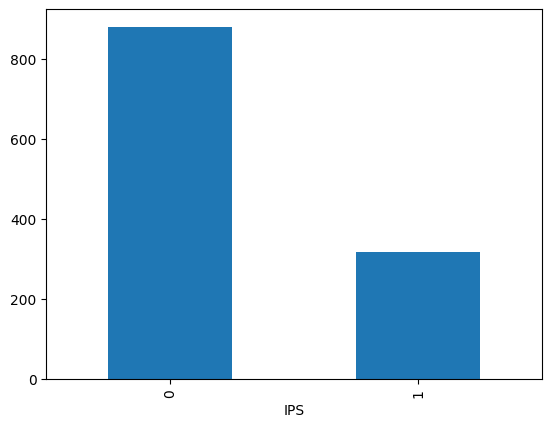

In [62]:
df['IPS'].value_counts().plot(kind = 'bar')

In [63]:
df.drop(columns = ['ScreenResolution','Inches','x_res','y_res'],inplace= True)

In [64]:
df.shape

(1198, 12)

In [65]:
df['Cpu']

,Cpu
0,Intel Core i5 2.3GHz
1,Intel Core i5 1.8GHz
2,Intel Core i5 7200U 2.5GHz
4,Intel Core i5 3.1GHz
5,AMD A9-Series 9420 3GHz
...,...
1269,Intel Core i7 6500U 2.5GHz
1270,Intel Core i7 6500U 2.5GHz
1271,Intel Core i7 6500U 2.5GHz
1272,Intel Celeron Dual Core N3050 1.6GHz


In [66]:
a = 'Intel Core i7 6500U 2.5GHz'

In [67]:
a.split() # to convert string into list

['Intel', 'Core', 'i7', '6500U', '2.5GHz']

In [68]:
a.split()[0:3]

['Intel', 'Core', 'i7']

In [69]:
" ".join(a.split()[0:3])

'Intel Core i7'

In [70]:
(lambda a: " ".join(a.split()[0:3]))('AMD A9-Series 9420 3GHz')

'AMD A9-Series 9420'

In [71]:
df['Cpu'] = df['Cpu'].apply(lambda a: " ".join(a.split()[0:3]))

In [72]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,483
Intel Core i5,409
Intel Core i3,133
Intel Celeron Dual,64
Intel Pentium Quad,27
AMD A9-Series 9420,11
Intel Core M,10
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


In [73]:
# Now we will filter the AMD cpu w.r.t the series
#AMD E-Series E2-6110	 >> AMD E-Series

In [74]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return "Other Intel Processor"
  else:
    if text[4] == 'E':
      return "AMD E-Series"
    elif text[4] == 'A':
      return "AMD A-Series"
    elif text[4] == 'F':
      return "AMD F-Series"
    else:
      return "AMD Ryzen Series"


In [75]:
a= 'Intel Core M'
a.split()[0]

'Intel'

In [76]:
b = 'AMD E-Series E2-6110'
b[4]

'E'

In [77]:
fetch_processor('AMD E-Series E2-6110')

'AMD E-Series'

In [78]:
df['Cpu'] = df['Cpu'].apply(fetch_processor)

<Axes: xlabel='Cpu'>

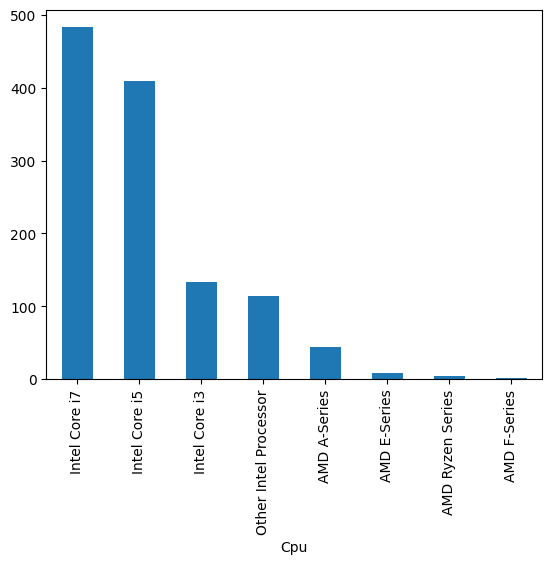

In [79]:
df['Cpu'].value_counts().plot(kind = 'bar')

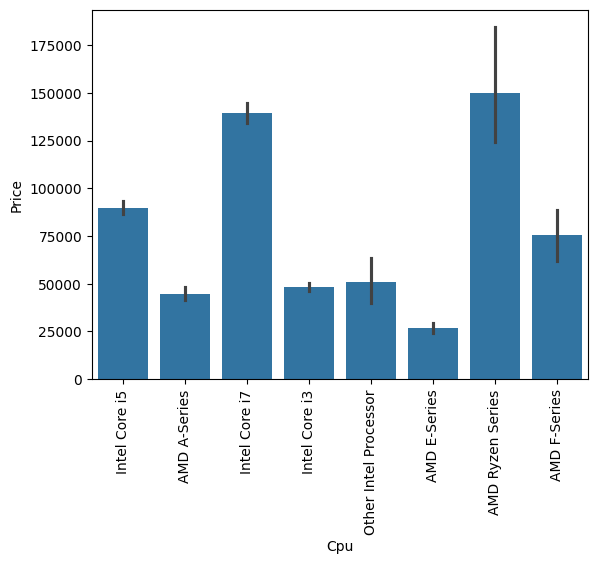

In [80]:
sns.barplot(x = df['Cpu'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

AMD Ryzen laptops are more costly as compared to other laptops

In [81]:
df['Gpu'] = df['Gpu'].apply(lambda a: " ".join(a.split()[0:2]))

In [82]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,570
Nvidia GeForce,353
AMD Radeon,162
Intel UHD,64
Nvidia Quadro,31
Intel Iris,10
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


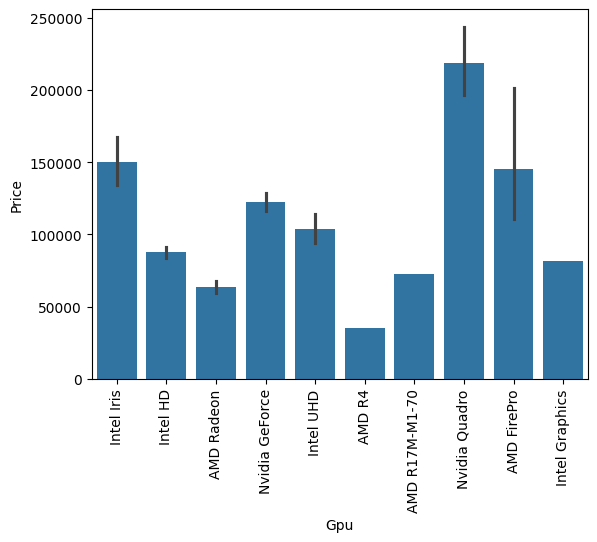

In [83]:
sns.barplot(x = df['Gpu'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

Here we can see that Nvidia Quadro Graphic cards are most expensive

In [84]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,997
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


In [85]:
# wherever we have Windows 10 or Windows 10s  >>> Windows 10
# wherever we have macOS or Mac OS X  >>> mac OS
# Windows 7  >>> Windows 7
# rest all keep same


In [86]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return "Windows 10"
  elif text == 'Windows 7':
    return "Windows 7"
  elif text == 'Mac OS X' or text == 'macOS':
    return "mac OS"
  elif text == 'No OS':
    return "No OS"
  elif text == 'Chrome OS':
    return "Chrome OS"
  else:
    return "Linux"

In [87]:
os('Mac OS X')

'mac OS'

In [88]:
df['OpSys'] = df['OpSys'].apply(os)

In [89]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,999
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
mac OS,11


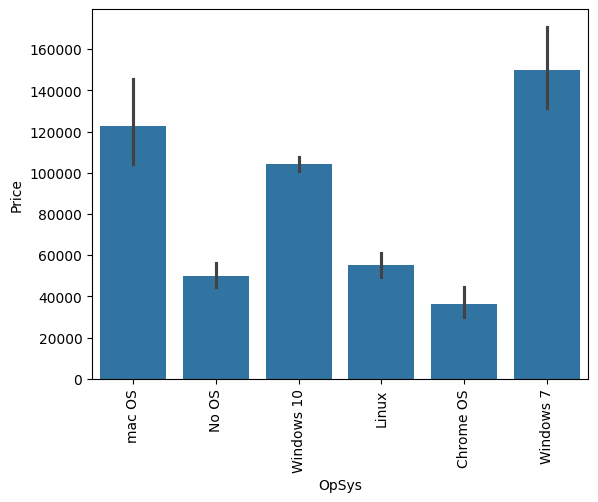

In [90]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [95]:
df[df['OpSys'] == 'Windows 7']['Price'].describe()

,Price
count,45.000000
mean,149977.022222
std,69184.160816
min,65534.000000
25%,103767.000000
50%,132935.000000
75%,182320.000000
max,390270.000000


In [107]:
#Flash storage
#SSD
#HDD
#Hybrid .. SSD + HDD
df['Memory'].value_counts()

,count
Memory,
256GB SSD,387
1TB HDD,213
500GB HDD,122
512GB SSD,99
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,28
2TB HDD,16


In [110]:
df['Memory'].str.split('+', n=1, expand = True).sample(5)

,0,1
498,256GB SSD,None
1267,1TB HDD,None
1068,256GB SSD,1TB HDD
213,256GB SSD,None
965,1TB HDD,None


In [114]:
#strip ... used to remove the extra white spaces from the start and end

new = df['Memory'].str.split('+', n=1, expand = True)
df['first'] = new[0]
df['first'] = df['first'].str.strip()
df['second'] = new[1]

In [113]:
df['first']

,first
0,128GB SSD
1,128GB Flash Storage
2,256GB SSD
4,256GB SSD
5,500GB HDD
...,...
1269,500GB HDD
1270,128GB SSD
1271,512GB SSD
1272,64GB Flash Storage


In [117]:
# get the values of first layer for each columns
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [119]:
#finding all the characters that are not numbers and removing them
#regex=True: This argument tells the str.replace function that the pattern we provided (r'\D') is a regular expression.
# \D is a special character in regular expressions that means "any character that is not a digit (0-9)
df['first'] = df['first'].str.replace(r'\D', '', regex= True)

In [121]:
#since most of the values are null, we will fill them for calculations
df['second'].fillna("0", inplace = True)

In [122]:
#remove extra spaces
df['second']=df['second'].str.strip()

In [123]:
# get the values of second layer for each columns
df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

In [124]:
df['second']=df['second'].str.replace(r'\D','',regex=True)

In [125]:
#convert these both into integers as we have removed the text by using \D
#also we have find out about ssd and hdd before replacing these texts
df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

In [128]:
#combine the first and second columns for finding hdd
df['HDD'] = df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD']
#col = actual numeric value * if hdd present then 1 else 0 + actual num val * if hdd present 1 else 0

In [129]:
#combine the first and second columns for finding ssd
df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']

In [130]:
#combine the first and second columns for finding hybrid and flash storage
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']

df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

In [131]:
#drop the columns which are of no use
df.drop(columns = ['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [133]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
645,Lenovo,Notebook,Other Intel Processor,4,32GB Flash Storage,Intel HD,Windows 10,1.43,24364,111.94,0,0,0,0,0,32
608,Lenovo,2 in 1 Convertible,Intel Core i7,8,256GB SSD,Intel HD,Windows 10,2.00,115507,141.21,1,1,0,256,0,0
518,HP,Notebook,Intel Core i5,8,256GB SSD,Nvidia GeForce,Windows 10,2.04,79050,141.21,0,0,0,256,0,0


In [134]:
df.to_csv('Cleaned.csv')